# 過誤
仮説検証を用いることで因果推論やABテストにおいて結果が有意かが分かる。しかし時として帰無仮説が受容されるべきが棄却されて対立仮説が採択される事や帰無仮説が間違っているのに帰無仮説を棄却してします事がある。

ここでは帰無仮説を誤って採択する第一種の過誤(αエラー)と対立仮説を間違って採択する第二種の過誤(βエラー)が起きる確率を学ぶ。

## ライブラリのインポート

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

## データの読み込み

In [2]:
df = pd.read_csv("iris.csv")
df.head()

,category,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2


## データの分布の確認
ここでβエラーを検証したいためできるだけ分布が重なっているデータを使用するために可視化を行う。

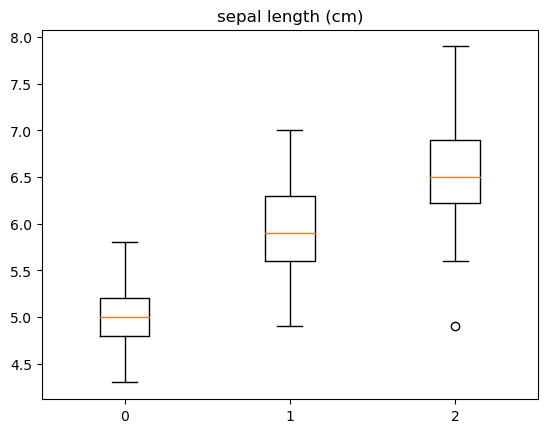

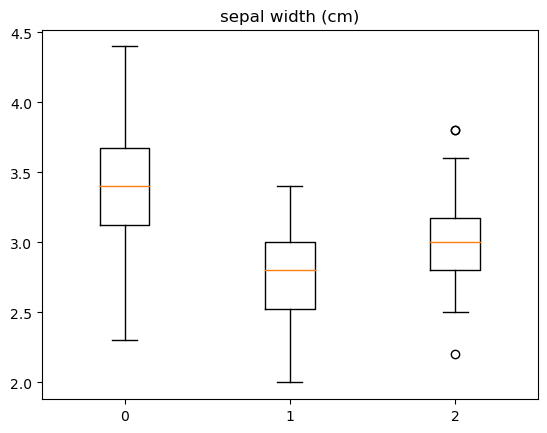

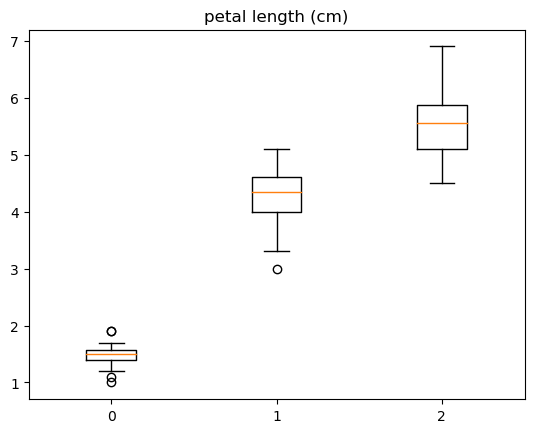

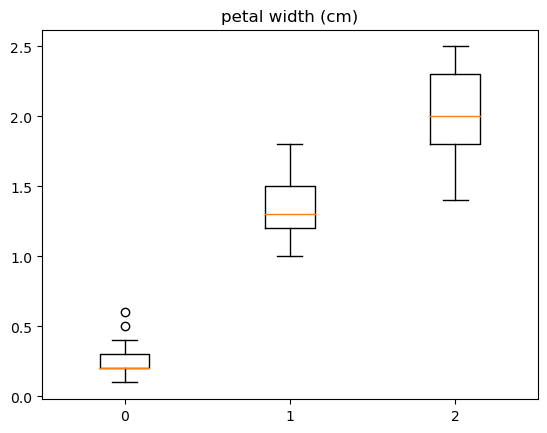

In [3]:
df_0 = df[df["category"]==0]
df_1 = df[df["category"]==1]
df_2 = df[df["category"]==2]
for col in df.columns:
    if col != "category":
        plt.title(col)
        plt.boxplot([df_0[col], df_1[col], df_2[col]], positions=[0, 1, 2])
        plt.show()

この結果からsepalのデータが重なっている事が分かる。ここからβエラーの計算を行う。
計算しやすくするためプールした分散を使用する。
## βエラーの計算
βエラーは帰無仮説(ここではラベルが0)と対立仮説の正規分布において帰無仮説の上位95%のx座標における対立仮説から-∞までの面積である。ここでは概算で行う。計算方法として積分は台形の面積の求め方の応用を行う。

C:\Users\decar\anaconda\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


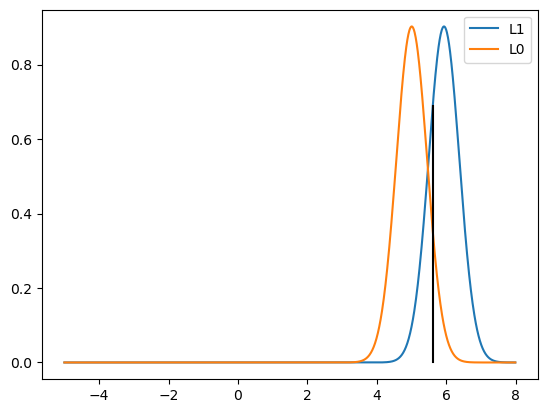

,帰無仮説が正しい,対立仮説が正しい
対立仮説が正しいとは言えない,0.95,0.230388
対立仮説が正しい,0.05,0.769612


In [4]:
col = "sepal length (cm)"
size_min = -5
size_max = 8
x = np.arange(size_min, size_max, 0.01)
mean1 = df_1[col].mean()
std1 = df_1[col].std()
mean0 = df_0[col].mean()
std0 = df_0[col].std()
var = ((len(df_1) - 1) * (std1 ** 2) + (len(df_0) - 1) * (std0 ** 2)) / (len(df_1) + len(df_0) - 2)
std = np.sqrt(var)
L1 = stats.norm.pdf(x, loc=mean1, scale=std)
L0 = stats.norm.pdf(x, loc=mean0, scale=std)
alpha = np.percentile(df_0[col].values, [95])
height = stats.norm.pdf(alpha, loc=mean1, scale=std)
plt.plot(x, L1, label="L1")
plt.plot(x, L0, label="L0")
plt.plot([alpha, alpha], [0, height], color="#000000")
plt.legend()
plt.show()
beta = 0
for i in range(len(x)-1):
    if x[i+1] > alpha:
        break
    beta = beta + (stats.norm.pdf(x[i], loc=mean1, scale=std)+ stats.norm.pdf(x[i+1], loc=mean1, scale=std))*(x[i+1]-x[i]) /2
matrix = [[1-0.05, beta],
          [0.05, 1-beta]]
df_matrix = pd.DataFrame(matrix)
df_matrix.columns = ["帰無仮説が正しい", "対立仮説が正しい"]
df_matrix.index = ["対立仮説が正しいとは言えない", "対立仮説が正しい"]
df_matrix